First, create a new conda environment named BI2025 and install the required packages from requirements.txt


In [304]:
#!conda create -n BI2025 python=3.11 -y
#!conda activate BI2025
!pip install -r requirements.txt

  Cloning https://github.com/GreenfishK/starvers.git to /private/var/folders/m2/0ky0l5pd0jvfps2qmjx5fvv00000gn/T/pip-install-o2y3kajw/starvers_45c39251f24e4bd4bbdb35987caf28ac
  Running command git clone --filter=blob:none --quiet https://github.com/GreenfishK/starvers.git /private/var/folders/m2/0ky0l5pd0jvfps2qmjx5fvv00000gn/T/pip-install-o2y3kajw/starvers_45c39251f24e4bd4bbdb35987caf28ac
  Resolved https://github.com/GreenfishK/starvers.git to commit 51ad36a7d6f1a56a3137a84e42187d66a0db423e
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [305]:
# DO NOT MODIFY OR COPY THIS CELL!! 
# Note: The only imports allowed are Python's standard library, pandas, numpy, scipy, matplotlib, seaborn and scikit-learn
import numpy as np
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt
import plotly.express as px
import datetime
import typing
import requests
import time
import shutil
import json 
from starvers.starvers import TripleStoreEngine
import sklearn
from sklearn.preprocessing import StandardScaler

## Graph-based documentation preliminaries

**!!!IMPORTANT!!!**

Everytime you work on this notebook, enter your student ID in the `executed_by` variable so that the cell executions are accredited to you.

In [306]:
executed_by ='stud-id_12434665'  # Replace the digits after "id_" with your own student ID

Set your group and student IDs. Do this only once.

In [307]:
# group id for this project
group_id = '06'  # Replace the digits with your group id

# Students working on this notebook
student_a = 'stud-id_12127674'  # Replace the digits after "id_" with student A's student ID
student_b = 'stud-id_12434665'  # Replace the digits after "id_" with student B's student ID

In [308]:
# Roles. Don't change these values.
code_writer_role = 'code_writer'
code_executor_role = 'code_executor'

Setup the starvers API for logging your steps into our server-sided graph database.

In [309]:
get_endpoint = "https://starvers.ec.tuwien.ac.at/BI2025"
post_endpoint = "https://starvers.ec.tuwien.ac.at/BI2025/statements"
engine = TripleStoreEngine(get_endpoint, post_endpoint, skip_connection_test=True)

Use these prefixes in your notebooks. You can extend this dict with your prefixes of additional ontologies that you use in this notebook. Replace 00 with your group id

In [310]:
prefixes = {
    'xsd': 'http://www.w3.org/2001/XMLSchema#',
    'rdfs': 'http://www.w3.org/2000/01/rdf-schema#',
    'foaf': 'http://xmlns.com/foaf/0.1/',
    'prov': 'http://www.w3.org/ns/prov#',
    'sc': 'https://schema.org/',
    'cr': 'http://mlcommons.org/croissant/',
    'mls': 'http://www.w3.org/ns/mls#',
    'mlso': 'http://w3id.org/mlso',
    'siu': 'https://si-digital-framework.org/SI/units/',
    'siq': 'https://si-digital-framework.org/SI/quantities/',
    'qudt': 'http://qudt.org/schema/qudt/',
    '': f'https://starvers.ec.tuwien.ac.at/BI2025/{group_id}/',
}

prefix_header = '\n'.join([f'PREFIX {k}: <{v}>' for k, v in prefixes.items()]) + '\n\n'

Ontologies to use
* Provenance of the experiment process
    * PROV-O: 
        * doc: https://www.w3.org/TR/prov-o/
        * serialization: https://www.w3.org/ns/prov-o
* Data used and created
    * schema.org - Dataset: 
        * doc: https://schema.org/Dataset
        * serialization: https://schema.org/version/latest/schemaorg-current-https.ttl
    * Crossaint
        * doc: https://docs.mlcommons.org/croissant/docs/croissant-spec.html
        * serialization: https://github.com/mlcommons/croissant/blob/main/docs/croissant.ttl
* ML experiments performed
    * MLSO: 
        * doc: https://github.com/dtai-kg/MLSO
        * doc: https://dtai-kg.github.io/MLSO/#http://w3id.org/
        * serialization: https://dtai-kg.github.io/MLSO/ontology.ttl
* Measurements, Metrics, Units
    * QUDT
        * doc:https://qudt.org/
        * doc: https://github.com/qudt/qudt-public-repo
        * serialization: https://github.com/qudt/qudt-public-repo/blob/main/src/main/rdf/schema/SCHEMA_QUDT.ttl
    * SI Digital Framework
        * doc: https://github.com/TheBIPM/SI_Digital_Framework/blob/main/SI_Reference_Point/docs/README.md
        * doc: https://si-digital-framework.org/
        * doc: https://si-digital-framework.org/SI
        * serialization: https://github.com/TheBIPM/SI_Digital_Framework/blob/main/SI_Reference_Point/TTL/si.ttl
    * Quantities and Units
        * doc: https://www.omg.org/spec/Commons
        * serialization: https://www.omg.org/spec/Commons/QuantitiesAndUnits.ttl

Use this function to record execution times.

In [311]:
def now() -> str:
    """
    Returns the current time in ISO 8601 format with UTC timezone in the following format:
    YYYY-MM-DDTHH:MM:SS.sssZ
    """
    timestamp = datetime.datetime.now(datetime.timezone.utc)
    timestamp_formated = timestamp.strftime("%Y-%m-%dT%H:%M:%S.%f")[:-3]  +"Z"

    return timestamp_formated

Register yourself in the Knowledge Graph using ProvO. Change the given name, family name and immatriculation number to reflect your own data.

In [312]:
# Ontologies used: foaf, prov, IAO
reigstration_triples_a = [
f':{student_a} rdf:type foaf:Person .',
f':{student_a} rdf:type prov:Agent .',
f':{student_a} foaf:givenName "Nikola" .',
f':{student_a} foaf:familyName "Lukic" .',
f':{student_a} <http://vivoweb.org/ontology/core#identifier> :{student_a} .',
f':{student_a} rdf:type <http://purl.obolibrary.org/obo/IAO_0000578> .',
f':{student_a} <http://www.w3.org/2000/01/rdf-schema#label> "Immatriculation number" .',
f':{student_a} <http://purl.obolibrary.org/obo/IAO_0000219> "12127674"^^xsd:string .',
]

reigstration_triples_b = [
f':{student_b} rdf:type foaf:Person .',
f':{student_b} rdf:type prov:Agent .',
f':{student_b} foaf:givenName "Kerim" .',
f':{student_b} foaf:familyName "Halilovic" .',
f':{student_b} <http://vivoweb.org/ontology/core#identifier> :{student_b} .',
f':{student_b} rdf:type <http://purl.obolibrary.org/obo/IAO_0000578> .',
f':{student_b} <http://www.w3.org/2000/01/rdf-schema#label> "Immatriculation number" .',
f':{student_b} <http://purl.obolibrary.org/obo/IAO_0000219> "12434665"^^xsd:string .',
]

role_triples = [
    f':{code_writer_role} rdf:type prov:Role .',
    f':{code_executor_role} rdf:type prov:Role .',
]


engine.insert(reigstration_triples_a, prefixes=prefixes)
engine.insert(reigstration_triples_b, prefixes=prefixes)
engine.insert(role_triples, prefixes=prefixes)

**What not do do**

Do not use [blank nodes](https://www.w3.org/wiki/BlankNodes).

PROV-O uses blank nodes to connect multiple elements with each other.
Such blank nodes (such as _:association) should not be used.
Instead, assign a fixed node ID such as
:5119fcd7-b571-41e0-9464-a37c7be0f574 by generating them outside of the
notebook.
We suggest that, for each setting where such a blank node is needed to
connect multiple elements, you create a unique hash (using uuid.uuid4())
and keep this as hard-coded identifier for the blank node. The template
notebook contains examples of this. Do *not* use these provided values,
as otherwise, your provenance documentations will all be connected via
these identifiers!
Also, do not generate them dynamically in every cell execution, e.g. by
using uuid.uuid4() in a cell. This would generate many new linking nodes
for connecting the same elements.
Compute one for each node (cell) where you need them and make sure to
use the same one on each re-execution of the notebook.

## Business Understanding 

In [313]:
## Each Activity that follows is part of the Business Understanding Phase

business_understanding_phase_executor = [
f':business_understanding_phase rdf:type prov:Activity .',
f':business_understanding_phase rdfs:label "Business Understanding Phase" .', ## Phase 1: Business Understanding
]
engine.insert(business_understanding_phase_executor, prefixes=prefixes)


In [314]:
#############################################
# Documentation
#############################################

data_src_and_scenario_comment = """
The dataset consists of two CSV files (`rome_weekdays.csv` and `rome_weekends.csv`) containing Airbnb listings in Rome. It includes attributes such as price (`realSum`), room type, capacity, cleanliness rating, guest satisfaction, and distance from the city center and metro.

Scenario: A property management firm in Rome wants to optimize their pricing strategy and investment portfolio. They need to understand which factors most significantly drive listing prices (e.g., is being closer to the metro more valuable than a high cleanliness rating?) to predict the optimal price for new properties entering the market.
"""

business_objectives_comment = """
The primary business objective is to maximize revenue for property owners by setting optimal rental prices. This requires identifying the key drivers of listing value in the Rome market (e.g., location vs. amenities) and providing a tool to estimate fair market value for new or existing listings to avoid underpricing or overpricing.
"""

business_success_criteria_comment = """
1. Insight Generation: Identify the top 3 factors that account for at least 50% of the explained variance in listing prices, providing actionable levers for property managers.
2. Pricing Accuracy: The model should predict listing prices with sufficient accuracy to be useful for setting initial rental rates (e.g., within a reasonable error margin relative to the average listing price).
"""

data_mining_goals_comment = """
1. Regression Task: Develop a regression model to predict the `realSum` (total price) of a listing based on its features (distance, room type, satisfaction, etc.).
2. Feature Importance: Analyze the model to determine feature importance coefficients, quantifying the impact of distance, room type, and weekday vs. weekend timing on price.
"""

data_mining_success_criteria_comment = """
1. Model Performance: Achieve an R-squared (R^2) score of at least 0.60 on the test set, indicating that the model explains at least 60% of the variance in pricing.
2. Error Metric: Achieve a Mean Absolute Error (MAE) lower than 40 Euros, ensuring the predicted price is, on average, within a useful range of the actual market price.
"""

ai_risk_aspects_comment = """
1. Bias & Fairness: The dataset might reflect existing gentrification patterns. If location is a strong predictor, the model might undervalue properties in up-and-coming neighborhoods, potentially reinforcing economic disparities.
2. Temporal Validity: The data is a snapshot in time. Prices fluctuate seasonally (e.g., Jubilee year in Rome). A risk exists that the model becomes obsolete if not retraining regularly with current data.
3. Data Quality: "Guest satisfaction" is subjective. Relying heavily on it might introduce noise if ratings are biased or manipulated.
"""

bu_ass_uuid_executor = "bb6a40f9-9d92-4f9f-bbd2-b65ef6a82da2" # Generate once
business_understanding_executor = [
f':business_understanding rdf:type prov:Activity .',
f':business_understanding sc:isPartOf :business_understanding_phase .', # Connect Activity to Parent Business Understanding Phase Activity
f':business_understanding prov:qualifiedAssociation :{bu_ass_uuid_executor} .',
f':{bu_ass_uuid_executor} prov:agent :{executed_by} .',
f':{bu_ass_uuid_executor} rdf:type prov:Association .',
f':{bu_ass_uuid_executor} prov:hadRole :{code_executor_role} .',
]
engine.insert(business_understanding_executor, prefixes=prefixes)


business_understanding_data_executor = [
# 1a
f':bu_data_source_and_scenario rdf:type prov:Entity .',
f':bu_data_source_and_scenario prov:wasGeneratedBy :business_understanding .',
f':bu_data_source_and_scenario rdfs:label "1a Data Source and Scenario" .',
f':bu_data_source_and_scenario rdfs:comment """{data_src_and_scenario_comment}""" .',
# 1b
f':bu_business_objectives rdf:type prov:Entity .',
f':bu_business_objectives prov:wasGeneratedBy :business_understanding .',
f':bu_business_objectives rdfs:label "1b Business Objectives" .',
f':bu_business_objectives rdfs:comment """{business_objectives_comment}""" .',
# 1c
f':bu_business_success_criteria rdf:type prov:Entity .',
f':bu_business_success_criteria prov:wasGeneratedBy :business_understanding .',
f':bu_business_success_criteria rdfs:label "1c Business Success Criteria" .',
f':bu_business_success_criteria rdfs:comment """{business_success_criteria_comment}""" .',
# 1d
f':bu_data_mining_goals rdf:type prov:Entity .',
f':bu_data_mining_goals prov:wasGeneratedBy :business_understanding .',
f':bu_data_mining_goals rdfs:label "1d Data Mining Goals" .',
f':bu_data_mining_goals rdfs:comment """{data_mining_goals_comment}""" .',
# 1e
f':bu_data_mining_success_criteria rdf:type prov:Entity .',
f':bu_data_mining_success_criteria prov:wasGeneratedBy :business_understanding .',
f':bu_data_mining_success_criteria rdfs:label "1e Data Mining Success Criteria" .',
f':bu_data_mining_success_criteria rdfs:comment """{data_mining_success_criteria_comment}""" .',
# 1f
f':bu_ai_risk_aspects rdf:type prov:Entity .',
f':bu_ai_risk_aspects prov:wasGeneratedBy :business_understanding .',
f':bu_ai_risk_aspects rdfs:label "1f AI risk aspects" .',
f':bu_ai_risk_aspects rdfs:comment """{ai_risk_aspects_comment}""" .',

]
engine.insert(business_understanding_data_executor, prefixes=prefixes)

## Data Understanding

The following pseudo-code & pseudo-documentation may be used as a hint.

In [315]:
## Each Activity that follows is part of the Data Understanding Phase

business_understanding_phase_executor = [
f':data_understanding_phase rdf:type prov:Activity .',
f':data_understanding_phase rdfs:label "Data Understanding Phase" .', 
]
engine.insert(business_understanding_phase_executor, prefixes=prefixes)


In [316]:
rome_data_path = os.path.join("data")

load_data_code_writer = student_a  # Student A is responsible for Data Understanding

def load_airbnb_data() -> pd.DataFrame:
    ### Load Rome Airbnb data
    wd_file = os.path.join(rome_data_path, 'rome_weekdays.csv')
    we_file = os.path.join(rome_data_path, 'rome_weekends.csv')
    
    df_wd = pd.read_csv(wd_file)
    df_we = pd.read_csv(we_file)
    
    # Add a feature to distinguish them before merging
    df_wd['is_weekend'] = False
    df_we['is_weekend'] = True
    
    # Merge datasets
    full_data = pd.concat([df_wd, df_we], ignore_index=True)
    
    # Clean up the unnamed index column if it exists
    if 'Unnamed: 0' in full_data.columns:
        full_data.drop(columns=['Unnamed: 0'], inplace=True)
        
    return full_data

start_time_ld = now()
data = load_airbnb_data()
end_time_ld = now()

display(data.head())
print(data.info())

,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,is_weekend
0,156.874664,Private room,False,True,2.0,True,1,0,10.0,95.0,1,2.978468,1.595733,281.163932,6.230648,697.727246,15.191486,12.48654,41.92498,False
1,172.772543,Private room,False,True,2.0,False,1,0,9.0,80.0,1,0.935371,0.649269,482.707193,10.696887,1251.524333,27.249208,12.49627,41.90801,False
2,277.745307,Entire home/apt,False,False,4.0,False,0,1,9.0,90.0,1,2.203025,0.494697,691.708998,15.328408,1625.897266,35.400361,12.47700,41.90700,False
3,444.906834,Entire home/apt,False,False,6.0,False,1,0,9.0,92.0,2,2.703010,1.295153,805.592641,17.852092,2035.819533,44.325522,12.46969,41.90019,False
4,131.391298,Private room,False,True,3.0,False,1,0,9.0,91.0,1,1.295968,0.867455,317.076369,7.026475,836.622814,18.215634,12.51544,41.89463,False


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9027 entries, 0 to 9026
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   realSum                     9027 non-null   float64
 1   room_type                   9027 non-null   object 
 2   room_shared                 9027 non-null   bool   
 3   room_private                9027 non-null   bool   
 4   person_capacity             9027 non-null   float64
 5   host_is_superhost           9027 non-null   bool   
 6   multi                       9027 non-null   int64  
 7   biz                         9027 non-null   int64  
 8   cleanliness_rating          9027 non-null   float64
 9   guest_satisfaction_overall  9027 non-null   float64
 10  bedrooms                    9027 non-null   int64  
 11  dist                        9027 non-null   float64
 12  metro_dist                  9027 non-null   float64
 13  attr_index                  9027 

In [317]:
attribute_semantics = {
    "realSum": "Target Variable. Total price of the listing for 2 people for 2 nights. Unit: EUR",
    "room_type": "Categorical. The type of accommodation (e.g., 'Private room', 'Entire home/apt').",
    "room_shared": "Boolean. True if the room is shared with others.",
    "room_private": "Boolean. True if the room is private.",
    "person_capacity": "The maximum number of guests allowed. Unit: Count",
    "host_is_superhost": "Boolean. True if the host has 'Superhost' status (high ratings/reliability).",
    "multi": "Binary (0/1). Indicates if the host manages multiple listings (1=Yes).",
    "biz": "Binary (0/1). Indicates if the host is a business/professional entity (1=Yes).",
    "cleanliness_rating": "The cleanliness score given by guests. Unit: Scale (likely 1-10).",
    "guest_satisfaction_overall": "The overall rating score from guest reviews. Unit: Scale (0-100).",
    "bedrooms": "Number of bedrooms in the listing. Unit: Count",
    "dist": "Distance from the city center. Unit: Kilometers",
    "metro_dist": "Distance to the nearest metro station. Unit: Kilometers",
    "attr_index": "Undocumented attribute.",
    "attr_index_norm": "Undocumented attribute.",
    "rest_index": "Undocumented attribute.",
    "rest_index_norm": "Undocumented attribute.",
    "lng": "Longitude coordinate. Unit: Decimal Degrees",
    "lat": "Latitude coordinate. Unit: Decimal Degrees",
    "is_weekend": "Boolean. Derived feature indicating if the price is for a weekend stay."
}

print(f"{'Attribute':<30} | {'Description'}")
print("-" * 100)
for attr, desc in attribute_semantics.items():
    print(f"{attr:<30} | {desc}")

Attribute                      | Description
----------------------------------------------------------------------------------------------------
realSum                        | Target Variable. Total price of the listing for 2 people for 2 nights. Unit: EUR
room_type                      | Categorical. The type of accommodation (e.g., 'Private room', 'Entire home/apt').
room_shared                    | Boolean. True if the room is shared with others.
room_private                   | Boolean. True if the room is private.
person_capacity                | The maximum number of guests allowed. Unit: Count
host_is_superhost              | Boolean. True if the host has 'Superhost' status (high ratings/reliability).
multi                          | Binary (0/1). Indicates if the host manages multiple listings (1=Yes).
biz                            | Binary (0/1). Indicates if the host is a business/professional entity (1=Yes).
cleanliness_rating             | The cleanliness score given by

In [318]:
ld_ass_uuid_executor = "b8bac193-c4e6-4e31-9134-b23e001e279c"
load_data_executor = [
    f':load_airbnb_data prov:qualifiedAssociation :{ld_ass_uuid_executor} .',
    f':{ld_ass_uuid_executor} prov:agent :{executed_by} .',
    f':{ld_ass_uuid_executor} rdf:type prov:Association .',
    f':{ld_ass_uuid_executor} prov:hadRole :{code_executor_role} .',
]
engine.insert(load_data_executor, prefixes=prefixes)

ld_ass_uuid_writer = "c600e15c-87a9-4e2a-be85-b6c2a3014210" 
ld_report = """
Loaded rome_weekdays.csv and rome_weekends.csv. Added a boolean flag 'is_weekend' 
to distinguish the sources and concatenated them into a single dataframe. 
"""

load_data_activity = [
    ':load_airbnb_data rdf:type prov:Activity .',
    ':load_airbnb_data sc:isPartOf :data_understanding_phase .',
    ':load_airbnb_data rdfs:comment \'Data Understanding\' .',
    f':load_airbnb_data rdfs:comment """{ld_report}""" .', 
    f':load_airbnb_data prov:startedAtTime "{start_time_ld}"^^xsd:dateTime .',
    f':load_airbnb_data prov:endedAtTime "{end_time_ld}"^^xsd:dateTime .',
    
    # Writer Association
    f':load_airbnb_data prov:qualifiedAssociation :{ld_ass_uuid_writer} .',
    f':{ld_ass_uuid_writer} prov:agent :{load_data_code_writer} .',
    f':{ld_ass_uuid_writer} rdf:type prov:Association .',
    f':{ld_ass_uuid_writer} prov:hadRole :{code_writer_role} .',
    
    # INPUT of activity
    ':load_airbnb_data prov:used :raw_rome_data .',
    ':raw_rome_data rdf:type prov:Entity .',
    
    # OUTPUT of activity
    ':data rdf:type prov:Entity .',
    ':data prov:wasGeneratedBy :load_airbnb_data .',
    ':data prov:wasDerivedFrom :raw_rome_data .',
]
engine.insert(load_data_activity, prefixes=prefixes)

# Describe the RAW data using Croissant/Schema.org
raw_data_triples = [
    ':raw_rome_data rdf:type sc:Dataset .',
    ':raw_rome_data sc:name \'Rome Airbnb Data\' .',
    ':raw_rome_data sc:description \'Weekdays and Weekends Airbnb listings in Rome with prices and distances.\' .',
    
    # Files - BROKEN DOWN INTO INDIVIDUAL TRIPLES
    ':rome_wd_csv rdf:type cr:FileObject .',
    ':rome_wd_csv sc:name \'rome_weekdays.csv\' .',
    ':rome_wd_csv sc:encodingFormat \'text/csv\' .',

    ':rome_we_csv rdf:type cr:FileObject .',
    ':rome_we_csv sc:name \'rome_weekends.csv\' .',
    ':rome_we_csv sc:encodingFormat \'text/csv\' .',

    ':raw_rome_data sc:distribution :rome_wd_csv .',
    ':raw_rome_data sc:distribution :rome_we_csv .',
]
engine.insert(raw_data_triples, prefixes=prefixes)

# Describe the LOADED (Output) data structure
data_structure_triples = [
    # Dataset and RecordSet Definitions
    ':data rdf:type sc:Dataset .',
    ':data sc:name \'Merged Rome Airbnb Data\' .',
    ':rome_recordset rdf:type cr:RecordSet .',
    ':data cr:recordSet :rome_recordset .',

    # --- Financial ---
    # Field: realSum
    ':rome_recordset cr:field :field_realSum .',
    ':field_realSum rdf:type cr:Field .',
    ':field_realSum sc:name \'realSum\' .',
    ':field_realSum sc:description \'The total price of the Airbnb listing.\' .',
    ':field_realSum cr:dataType xsd:double .',
    ':field_realSum qudt:unit siu:Euro .',

    # --- Room Characteristics ---
    # Field: room_type
    ':rome_recordset cr:field :field_room_type .',
    ':field_room_type rdf:type cr:Field .',
    ':field_room_type sc:name \'room_type\' .',
    ':field_room_type sc:description \'The type of room being offered (e.g. private, shared, etc.).\' .',
    ':field_room_type cr:dataType xsd:string .',

    # Field: room_shared
    ':rome_recordset cr:field :field_room_shared .',
    ':field_room_shared rdf:type cr:Field .',
    ':field_room_shared sc:name \'room_shared\' .',
    ':field_room_shared sc:description \'Whether the room is shared or not.\' .',
    ':field_room_shared cr:dataType xsd:boolean .',

    # Field: room_private
    ':rome_recordset cr:field :field_room_private .',
    ':field_room_private rdf:type cr:Field .',
    ':field_room_private sc:name \'room_private\' .',
    ':field_room_private sc:description \'Whether the room is private or not.\' .',
    ':field_room_private cr:dataType xsd:boolean .',

    # Field: person_capacity
    ':rome_recordset cr:field :field_capacity .',
    ':field_capacity rdf:type cr:Field .',
    ':field_capacity sc:name \'person_capacity\' .',
    ':field_capacity sc:description \'The maximum number of people that can stay in the room.\' .',
    ':field_capacity cr:dataType xsd:double .',
    ':field_capacity qudt:unit qudt:CountingUnit .',

    # Field: bedrooms
    ':rome_recordset cr:field :field_bedrooms .',
    ':field_bedrooms rdf:type cr:Field .',
    ':field_bedrooms sc:name \'bedrooms\' .',
    ':field_bedrooms sc:description \'The number of bedrooms in the listing.\' .',
    ':field_bedrooms cr:dataType xsd:double .',
    ':field_bedrooms qudt:unit qudt:CountingUnit .',

    # --- Host & Listing Type ---
    # Field: host_is_superhost
    ':rome_recordset cr:field :field_superhost .',
    ':field_superhost rdf:type cr:Field .',
    ':field_superhost sc:name \'host_is_superhost\' .',
    ':field_superhost sc:description \'Whether the host is a superhost or not.\' .',
    ':field_superhost cr:dataType xsd:boolean .',

    # Field: multi
    ':rome_recordset cr:field :field_multi .',
    ':field_multi rdf:type cr:Field .',
    ':field_multi sc:name \'multi\' .',
    ':field_multi sc:description \'Whether the listing is for multiple rooms or not.\' .',
    ':field_multi cr:dataType xsd:boolean .',

    # Field: biz
    ':rome_recordset cr:field :field_biz .',
    ':field_biz rdf:type cr:Field .',
    ':field_biz sc:name \'biz\' .',
    ':field_biz sc:description \'Whether the listing is for business purposes or not.\' .',
    ':field_biz cr:dataType xsd:boolean .',

    # --- Ratings ---
    # Field: cleanliness_rating
    ':rome_recordset cr:field :field_cleanliness .',
    ':field_cleanliness rdf:type cr:Field .',
    ':field_cleanliness sc:name \'cleanliness_rating\' .',
    ':field_cleanliness sc:description \'The cleanliness rating of the listing.\' .',
    ':field_cleanliness cr:dataType xsd:double .',

    # Field: guest_satisfaction_overall
    ':rome_recordset cr:field :field_satisfaction .',
    ':field_satisfaction rdf:type cr:Field .',
    ':field_satisfaction sc:name \'guest_satisfaction_overall\' .',
    ':field_satisfaction sc:description \'The overall guest satisfaction rating of the listing.\' .',
    ':field_satisfaction cr:dataType xsd:double .',

    # --- Location & Geometry ---
    # Field: dist
    ':rome_recordset cr:field :field_dist .',
    ':field_dist rdf:type cr:Field .',
    ':field_dist sc:name \'dist\' .',
    ':field_dist sc:description \'The distance from the city centre.\' .',
    ':field_dist cr:dataType xsd:double .',
    
    # Field: metro_dist
    ':rome_recordset cr:field :field_metro_dist .',
    ':field_metro_dist rdf:type cr:Field .',
    ':field_metro_dist sc:name \'metro_dist\' .',
    ':field_metro_dist sc:description \'The distance from the nearest metro station.\' .',
    ':field_metro_dist cr:dataType xsd:double .',

    # Field: lng
    ':rome_recordset cr:field :field_lng .',
    ':field_lng rdf:type cr:Field .',
    ':field_lng sc:name \'lng\' .',
    ':field_lng sc:description \'The longitude of the listing.\' .',
    ':field_lng cr:dataType xsd:double .',

    # Field: lat
    ':rome_recordset cr:field :field_lat .',
    ':field_lat rdf:type cr:Field .',
    ':field_lat sc:name \'lat\' .',
    ':field_lat sc:description \'The latitude of the listing.\' .',
    ':field_lat cr:dataType xsd:double .',

    # --- Derived/Added Features ---
    # Field: is_weekend
    ':rome_recordset cr:field :field_is_weekend .',
    ':field_is_weekend rdf:type cr:Field .',
    ':field_is_weekend sc:name \'is_weekend\' .',
    ':field_is_weekend sc:description \'Boolean flag indicating if data is from weekend file\' .',
    ':field_is_weekend cr:dataType xsd:boolean .',
]
engine.insert(data_structure_triples, prefixes=prefixes)

In [319]:
check_outliers_code_writer = student_a

def check_outliers(data: pd.DataFrame, threshold=3.0, columns=('realSum', 'dist')) -> dict:
    results = {}
    tmp = data.copy()
    
    for col in columns:
        if col not in tmp.columns:
            print(f"Skipping {col}: Not found in dataframe")
            continue

        series = tmp[col].dropna()
        mean = series.mean()
        std = series.std()
        
        z_scores = (series - mean) / std
        outliers = series[abs(z_scores) > threshold]
        
        Q1 = series.quantile(0.25)
        Q3 = series.quantile(0.75)
        IQR = Q3 - Q1
        iqr_outliers_count = len(series[(series < (Q1 - 1.5 * IQR)) | (series > (Q3 + 1.5 * IQR))])

        results[col] = {
            'outlier_count': len(outliers),
            'percentage': round((len(outliers) / len(series)) * 100, 2),
            'mean': round(mean, 2),
            'std': round(std, 2),
            'min_outlier': outliers.min() if not outliers.empty else 0,
            'max_outlier': outliers.max() if not outliers.empty else 0,
            'skewness': round(series.skew(), 2),
            'comparison_iqr_count': iqr_outliers_count
        }

        print(f"\nCOLUMN: {col}")
        print(f"Outliers Found: {results[col]['outlier_count']} ({results[col]['percentage']}%)")
        print(f"Range of Outliers: {results[col]['min_outlier']} to {results[col]['max_outlier']}")
        print(f"Skewness: {results[col]['skewness']} (If > 1, data is highly right-skewed)")

    return results

start_time_co = now()
# Checking outliers for Price (realSum) and Distance (dist)
outliers_report = check_outliers(data, threshold=3.0, columns=['realSum', 'dist'])
end_time_co = now()


#############################################
# Documentation: Outlier Check
#############################################

co_ass_uuid_executor = "15085e9d-15f1-4727-9b6e-776dd07fcd08"
check_outliers_executor = [
    f':check_outliers prov:qualifiedAssociation :{co_ass_uuid_executor} .',
    f':{co_ass_uuid_executor} prov:agent :{executed_by} .',
    f':{co_ass_uuid_executor} rdf:type prov:Association .',
    f':{co_ass_uuid_executor} prov:hadRole :{code_executor_role} .',
]
engine.insert(check_outliers_executor, prefixes=prefixes)

co_ass_uuid_writer = "cd4970df-9f40-4bb1-8fad-e4dc4fcdd284"
co_comment = """
Checking for outliers in 'realSum' and 'dist' using Z-score (threshold=3.0). 
High prices or extremely far locations might need exclusion.
"""

check_outliers_activity = [
    ':check_outliers rdf:type prov:Activity .',
    ':check_outliers sc:isPartOf :data_understanding_phase .',
    ':check_outliers rdfs:comment \'Data Understanding\' .',
    f':check_outliers rdfs:comment """{co_comment}""" .', 
    f':check_outliers prov:startedAtTime "{start_time_co}"^^xsd:dateTime .',
    f':check_outliers prov:endedAtTime "{end_time_co}"^^xsd:dateTime .',
    f':check_outliers prov:qualifiedAssociation :{co_ass_uuid_writer} .',
    f':{co_ass_uuid_writer} prov:agent :{check_outliers_code_writer} .',
    f':{co_ass_uuid_writer} rdf:type prov:Association .',
    f':{co_ass_uuid_writer} prov:hadRole :{code_writer_role} .',
    ':check_outliers prov:used :data .',
    
    ':outlier_report rdf:type prov:Entity .',
    # We truncate the JSON report in the comment if it's too long
    f':outlier_report rdfs:comment """{json.dumps(outliers_report, indent=2)[:2000]}""" .', 
    ':outlier_report prov:wasGeneratedBy :check_outliers .',
]
engine.insert(check_outliers_activity, prefixes=prefixes)


COLUMN: realSum
Outliers Found: 93 (1.03%)
Range of Outliers: 562.5043836064807 to 2418.3480232857173
Skewness: 5.85 (If > 1, data is highly right-skewed)

COLUMN: dist
Outliers Found: 42 (0.47%)
Range of Outliers: 7.963485322534634 to 9.553818557157236
Skewness: 0.66 (If > 1, data is highly right-skewed)


In [320]:
# Decision Block for Outliers
# 2. Activity: Inspecting the report and taking a decision
ior_ass_uuid_executor = "6eaa2c0a-e592-4d85-b37f-d695844910cf"
inspect_outlier_report_executor = student_a

inspect_outlier_report_activity = [
    ':inspect_outlier_report rdf:type prov:Activity .',
    ':inspect_outlier_report rdfs:comment \'Data Understanding\' .',
    ':inspect_outlier_report rdfs:comment "Inspected Z-scores. Decided to remove prices with Z > 3 as they likely distort the model." .', 
    f':inspect_outlier_report prov:startedAtTime "{now()}"^^xsd:dateTime .',
    f':inspect_outlier_report prov:endedAtTime "{now()}"^^xsd:dateTime .',
    
    f':inspect_outlier_report prov:qualifiedAssociation :{ior_ass_uuid_executor} .',
    f':{ior_ass_uuid_executor} prov:agent :{inspect_outlier_report_executor} .',
    f':{ior_ass_uuid_executor} rdf:type prov:Association .',
    f':{ior_ass_uuid_executor} prov:hadRole :{code_executor_role} .',
    
    ':inspect_outlier_report prov:used :outlier_report .',
    
    ':outlier_decision rdf:type prov:Entity .',
    f':outlier_decision rdfs:comment """Decision: Remove realSum outliers (Z>3). Keep dist outliers as they are physically possible.""" .',
    ':outlier_decision prov:wasGeneratedBy :inspect_outlier_report .',
]
engine.insert(inspect_outlier_report_activity, prefixes=prefixes)

**Continue with other tasks of the Data Understanding phase such as checking the distribution, skewness, plausibility of values, etc...**

In [321]:
# 2.b Descriptive Statistics and Skewness
stats_code_writer = student_a

def calculate_statistics(df: pd.DataFrame):
    # Basic descriptive statistics
    desc_stats = df.describe()
    
    # Calculate skewness for numeric columns
    numeric_df = df.select_dtypes(include=[np.number])
    skewness = numeric_df.skew()
    
    return desc_stats, skewness

start_time_stats = now()
desc_stats, skew_report = calculate_statistics(data)
end_time_stats = now()

print("--- Skewness Report ---")
print(skew_report.sort_values(ascending=False).head(5)) # Show top 5 skewed features
display(desc_stats)

#############################################
# Documentation: Statistics
#############################################

stats_ass_uuid_writer = "a1b2c3d4-e5f6-7890-1234-567890abcdef"
stats_comment = """
Calculated descriptive statistics (mean, std, min, max) and skewness. 
Observed high skewness in 'realSum' and 'dist', suggesting potential need for log-transformation.
"""

stats_activity = [
    ':calculate_statistics rdf:type prov:Activity .',
    ':calculate_statistics sc:isPartOf :data_understanding_phase .',
    ':calculate_statistics rdfs:label "2.b Descriptive Statistics" .',
    f':calculate_statistics rdfs:comment """{stats_comment}""" .',
    
    f':calculate_statistics prov:startedAtTime "{start_time_stats}"^^xsd:dateTime .',
    f':calculate_statistics prov:endedAtTime "{end_time_stats}"^^xsd:dateTime .',
    
    f':calculate_statistics prov:qualifiedAssociation :{stats_ass_uuid_writer} .',
    f':{stats_ass_uuid_writer} prov:agent :{stats_code_writer} .',
    f':{stats_ass_uuid_writer} rdf:type prov:Association .',
    f':{stats_ass_uuid_writer} prov:hadRole :{code_writer_role} .',
    
    ':calculate_statistics prov:used :data .',
    
    ':stats_report rdf:type prov:Entity .',
    f':stats_report rdfs:comment """Top Skewness: {skew_report.head(3).to_dict()}""" .',
    ':stats_report prov:wasGeneratedBy :calculate_statistics .',
]
engine.insert(stats_activity, prefixes=prefixes)

--- Skewness Report ---
realSum            5.849287
attr_index         2.850441
attr_index_norm    2.850383
bedrooms           1.277226
metro_dist         1.219336
dtype: float64


,realSum,person_capacity,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
count,9027.000000,9027.000000,9027.000000,9027.000000,9027.000000,9027.000000,9027.000000,9027.000000,9027.000000,9027.000000,9027.000000,9027.000000,9027.000000,9027.000000,9027.000000
mean,205.391950,3.357372,0.385953,0.334109,9.514678,93.122300,1.229755,3.026982,0.819794,470.578123,10.426968,1151.413675,25.078056,12.486139,41.895372
std,118.618103,1.309052,0.486847,0.471704,0.808415,7.815107,0.549710,1.644095,0.631361,299.267619,6.631054,615.893623,13.414188,0.028827,0.017964
min,46.057092,2.000000,0.000000,0.000000,2.000000,20.000000,0.000000,0.042789,0.011093,84.811373,1.879034,233.018570,5.073485,12.400790,41.818000
25%,138.405069,2.000000,0.000000,0.000000,9.000000,91.000000,1.000000,1.880467,0.325294,242.807802,5.380492,657.812173,14.329694,12.467430,41.884000
50%,182.591822,3.000000,0.000000,0.000000,10.000000,95.000000,1.000000,2.815721,0.621587,405.847946,8.993671,977.578443,21.287324,12.480000,41.897300
75%,240.806116,4.000000,1.000000,1.000000,10.000000,98.000000,1.000000,4.030506,1.220111,627.739813,13.910833,1541.907500,33.587132,12.505560,41.907190
max,2418.348023,6.000000,1.000000,1.000000,10.000000,100.000000,5.000000,9.553819,4.147201,4513.563486,100.000000,4592.883342,100.000000,12.582980,41.951780


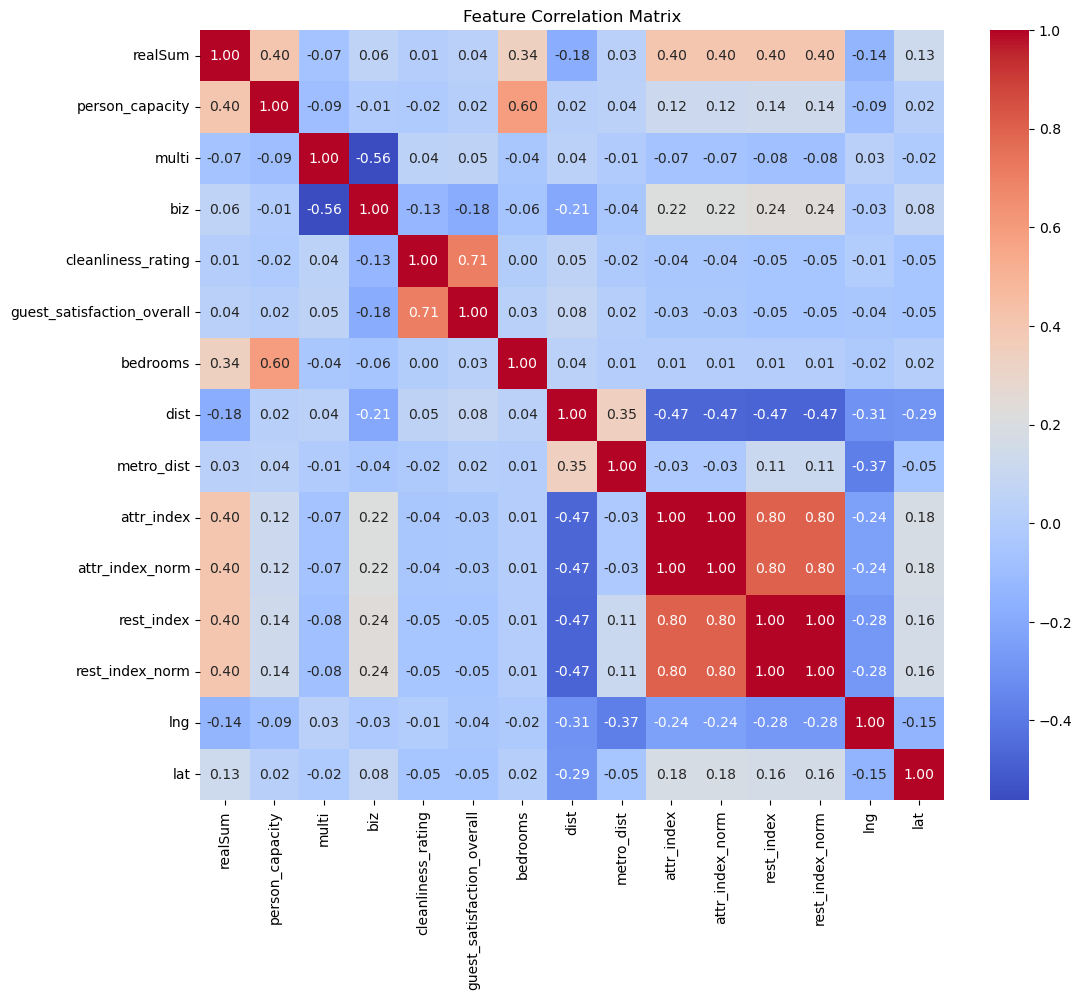

In [322]:
# 2.c Correlation Analysis
import seaborn as sns

def plot_correlation_matrix(df: pd.DataFrame):
    # Select only numeric columns for correlation
    numeric_df = df.select_dtypes(include=[np.number])
    corr_matrix = numeric_df.corr()
    
    plt.figure(figsize=(12, 10))
    sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
    plt.title('Feature Correlation Matrix')
    plt.show()
    
    return corr_matrix

start_time_corr = now()
correlation_matrix = plot_correlation_matrix(data)
end_time_corr = now()

#############################################
# Documentation: Correlation
#############################################

corr_ass_uuid_writer = "f9e8d7c6-b5a4-3210-fedc-ba0987654321"
corr_comment = """
Generated a Pearson correlation heatmap. 
"""

corr_activity = [
    ':correlation_analysis rdf:type prov:Activity .',
    ':correlation_analysis sc:isPartOf :data_understanding_phase .',
    ':correlation_analysis rdfs:label "2.c Correlation Analysis" .',
    f':correlation_analysis rdfs:comment """{corr_comment}""" .',
    
    f':correlation_analysis prov:startedAtTime "{start_time_corr}"^^xsd:dateTime .',
    f':correlation_analysis prov:endedAtTime "{end_time_corr}"^^xsd:dateTime .',
    
    f':correlation_analysis prov:qualifiedAssociation :{corr_ass_uuid_writer} .',
    f':{corr_ass_uuid_writer} prov:agent :{stats_code_writer} .', # Assuming same writer
    f':{corr_ass_uuid_writer} rdf:type prov:Association .',
    f':{corr_ass_uuid_writer} prov:hadRole :{code_writer_role} .',
    
    ':correlation_analysis prov:used :data .',
]
engine.insert(corr_activity, prefixes=prefixes)

In [323]:
# 2.e Data Quality Verification (Missing Values, Duplicates & Plausibility)
import json

def verify_data_quality(df: pd.DataFrame):
    missing_values = df.isnull().sum()
    duplicates = df.duplicated().sum()
    
    # Logic checks

    # Check for non-positive prices (realSum)
    invalid_prices = df[df['realSum'] <= 0]
    
    # Check for negative distances (dist, metro_dist)
    invalid_dist = df[df['dist'] < 0] if 'dist' in df.columns else []
    invalid_metro = df[df['metro_dist'] < 0] if 'metro_dist' in df.columns else []
    
    # Check for zero capacity (listings that fit 0 people?)
    invalid_capacity = df[df['person_capacity'] <= 0] if 'person_capacity' in df.columns else []

    report = {
        "total_rows": len(df),
        "duplicate_rows": int(duplicates),
        "columns_with_nans": missing_values[missing_values > 0].to_dict(),
        "plausibility_issues": {
            "prices_lte_zero": len(invalid_prices),
            "dist_lt_zero": len(invalid_dist),
            "metro_dist_lt_zero": len(invalid_metro),
            "capacity_lte_zero": len(invalid_capacity)
        }
    }
    return report

start_time_qual = now()
quality_report = verify_data_quality(data)
end_time_qual = now()

print("--- Data Quality Report ---")
print(json.dumps(quality_report, indent=2))

#############################################
# Documentation: Data Quality
#############################################

# You might want to generate a new unique ID here for the association
qual_ass_uuid_writer = "12345678-abcd-9012-efgh-345678901234" 

# Detailed comment summarizing findings for the graph
# We dynamically inject the results so the graph contains the actual stats
qual_comment = f"""
Data Quality Verification:
1. Completeness: Checked for NaNs. Found {len(quality_report['columns_with_nans'])} columns with missing data.
2. Uniqueness: Checked for duplicates. Found {quality_report['duplicate_rows']} duplicate rows.
3. Plausibility: 
   - Listings with Price <= 0: {quality_report['plausibility_issues']['prices_lte_zero']}
   - Listings with Dist < 0: {quality_report['plausibility_issues']['dist_lt_zero']}
   - Listings with Capacity <= 0: {quality_report['plausibility_issues']['capacity_lte_zero']}
"""

qual_activity = [
    ':verify_data_quality rdf:type prov:Activity .',
    ':verify_data_quality sc:isPartOf :data_understanding_phase .',
    ':verify_data_quality rdfs:label "2.e Data Quality Verification" .',
    f':verify_data_quality rdfs:comment """{qual_comment}""" .',
    
    f':verify_data_quality prov:startedAtTime "{start_time_qual}"^^xsd:dateTime .',
    f':verify_data_quality prov:endedAtTime "{end_time_qual}"^^xsd:dateTime .',
    
    f':verify_data_quality prov:qualifiedAssociation :{qual_ass_uuid_writer} .',
    # Note: Ensure 'stats_code_writer' is defined as student_a previously, or change to student_a
    f':{qual_ass_uuid_writer} prov:agent :{stats_code_writer} .', 
    f':{qual_ass_uuid_writer} rdf:type prov:Association .',
    f':{qual_ass_uuid_writer} prov:hadRole :{code_writer_role} .',
    
    ':verify_data_quality prov:used :data .',
    
    # Logging the output report as an entity in the graph
    ':quality_report_entity rdf:type prov:Entity .',
    ':quality_report_entity sc:name "JSON Quality Report" .',
    # We escape the JSON string to ensure it doesn't break the triple format
    f':quality_report_entity rdfs:comment \'\'\'{json.dumps(quality_report)}\'\'\' .',
    ':quality_report_entity prov:wasGeneratedBy :verify_data_quality .',
]

engine.insert(qual_activity, prefixes=prefixes)

--- Data Quality Report ---
{
  "total_rows": 9027,
  "duplicate_rows": 0,
  "columns_with_nans": {},
  "plausibility_issues": {
    "prices_lte_zero": 0,
    "dist_lt_zero": 0,
    "metro_dist_lt_zero": 0,
    "capacity_lte_zero": 0
  }
}


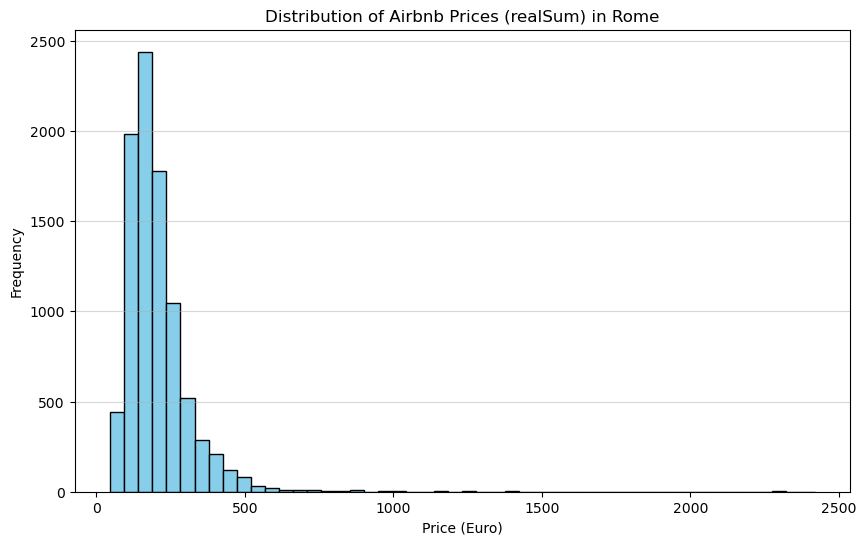

In [324]:
# 2.d Visual Exploration: Price Distribution Histogram
def plot_price_distribution(df):
    plt.figure(figsize=(10, 6))
    plt.hist(df['realSum'], bins=50, color='skyblue', edgecolor='black')
    plt.title('Distribution of Airbnb Prices (realSum) in Rome')
    plt.xlabel('Price (Euro)')
    plt.ylabel('Frequency')
    plt.grid(axis='y', alpha=0.5)
    plt.show()

# Execute the plot
plot_price_distribution(data)

#############################################
# Documentation: Visual Exploration
#############################################

ve_ass_uuid_executor = "7622915c-1234-5678-90ab-cdef12345678" # Generate UUID
visual_exp_comment = "Created a histogram to inspect the distribution of listing prices (realSum)."

visual_exp_executor = [
    f':visualize_price_dist rdf:type prov:Activity .',
    f':visualize_price_dist sc:isPartOf :data_understanding_phase .',
    f':visualize_price_dist rdfs:label "2.d Visual Exploration - Histogram" .',
    f':visualize_price_dist rdfs:comment """{visual_exp_comment}""" .',
    
    f':visualize_price_dist prov:startedAtTime "{now()}"^^xsd:dateTime .',
    f':visualize_price_dist prov:endedAtTime "{now()}"^^xsd:dateTime .',
    
    f':visualize_price_dist prov:qualifiedAssociation :{ve_ass_uuid_executor} .',
    f':{ve_ass_uuid_executor} prov:agent :{executed_by} .',
    f':{ve_ass_uuid_executor} rdf:type prov:Association .',
    f':{ve_ass_uuid_executor} prov:hadRole :{code_executor_role} .',
    
    f':visualize_price_dist prov:used :data .',
]
engine.insert(visual_exp_executor, prefixes=prefixes)

In [325]:
# 2.d Visual Exploration: Map of Listings
def visualize_rome_listings(df: pd.DataFrame):
    # Create an interactive map
    # We use 'open-street-map' style to render a map background without needing an API token
    fig = px.scatter_map(
        df,
        lat="lat",
        lon="lng",
        color="realSum",                # Color points by price
        size="person_capacity",         # Size points by capacity
        hover_name="room_type",
        hover_data=["dist", "guest_satisfaction_overall"],
        color_continuous_scale=px.colors.sequential.Viridis,
        zoom=11,
        center={"lat": 41.9028, "lon": 12.4964}, # Center on Rome
        height=600,
        width=900,
        #mapbox_style="open-street-map",
        title="Rome Airbnb Listings Distribution"
    )
    
    # Update layout for better visibility
    fig.update_layout(margin={"r":0,"t":40,"l":0,"b":0})
    fig.show()

# Execute the visualization
df_filtered = data[data['realSum'] < 500].copy()
visualize_rome_listings(df_filtered)
visualize_rome_listings(data)

In [326]:
# 2.e Ethical Sensitivity & Class Imbalance Analysis
def analyze_class_balance(df: pd.DataFrame):
    report = {}
    
    # 1. Room Type: Check for minority classes (e.g. Shared rooms)
    room_counts = df['room_type'].value_counts(normalize=True)
    report['room_type_distribution'] = room_counts.to_dict()
    
    # 2. Superhost: Check balance (often biased towards non-superhosts)
    superhost_counts = df['host_is_superhost'].value_counts(normalize=True)
    report['superhost_distribution'] = superhost_counts.to_dict()
    
    # 3. Multi: Indicator whether listing is for multiple rooms or not
    # High prevalence might indicate hotel-style operations vs. single listings
    multi_counts = df['multi'].value_counts(normalize=True)
    report['multi_distribution'] = multi_counts.to_dict()
    
    return report

start_time_eth = now()
balance_report = analyze_class_balance(data)
end_time_eth = now()

print("--- Class Balance Report (Percentages) ---")
print(json.dumps(balance_report, indent=2))

#############################################
# Documentation: Ethical & Bias Analysis
#############################################

eth_ass_uuid = "22334455-6677-8899-aabb-ccddeeff0011"
eth_comment = """
Analyzed dataset for minority classes and imbalances:
- 'room_type': Checked for underrepresented categories (e.g., Shared room).
- 'multi': Analyzed distribution of listings representing multiple rooms vs single rooms.
- 'lat/lng': Location data serves as a proxy for socio-economic bias (spatial distribution).
"""

eth_activity = [
    ':analyze_ethics_and_bias rdf:type prov:Activity .',
    ':analyze_ethics_and_bias sc:isPartOf :data_understanding_phase .',
    ':analyze_ethics_and_bias rdfs:label "2.e Ethical & Bias Analysis" .',
    f':analyze_ethics_and_bias rdfs:comment """{eth_comment}""" .',
    
    f':analyze_ethics_and_bias prov:startedAtTime "{start_time_eth}"^^xsd:dateTime .',
    f':analyze_ethics_and_bias prov:endedAtTime "{end_time_eth}"^^xsd:dateTime .',
    
    f':analyze_ethics_and_bias prov:qualifiedAssociation :{eth_ass_uuid} .',
    f':{eth_ass_uuid} prov:agent :{executed_by} .',
    f':{eth_ass_uuid} rdf:type prov:Association .',
    f':{eth_ass_uuid} prov:hadRole :{code_executor_role} .',
    
    ':analyze_ethics_and_bias prov:used :data .',
    
    ':bias_report rdf:type prov:Entity .',
    f':bias_report rdfs:comment """{json.dumps(balance_report)}""" .',
    ':bias_report prov:wasGeneratedBy :analyze_ethics_and_bias .',
]
engine.insert(eth_activity, prefixes=prefixes)

--- Class Balance Report (Percentages) ---
{
  "room_type_distribution": {
    "Entire home/apt": 0.6160407665891215,
    "Private room": 0.38262988811343746,
    "Shared room": 0.0013293452974410102
  },
  "superhost_distribution": {
    "false": 0.6733133931538717,
    "true": 0.32668660684612827
  },
  "multi_distribution": {
    "0": 0.61404674864296,
    "1": 0.38595325135704
  }
}


In [327]:
# 2.f Potential Risks and Expert Questions

# Define the text for risks and questions
risks_text = """
1. Temporal Bias: Data is a snapshot (Weekdays/Weekends). Prices during events or off-seasons are not represented.
2. Subjectivity Risk: 'guest_satisfaction_overall' is subjective. Cultural differences in rating styles are not accounted for.
"""

expert_questions_text = """
1. Are there specific legal restrictions in Rome that artificially inflate prices in certain lat/lng areas?
2. Does the 'dist' metric measure walking distance or straight-line distance?
"""

risk_ass_uuid = "8899aabb-ccdd-eeff-0011-223344556677"

risk_activity = [
    ':assess_risks rdf:type prov:Activity .',
    ':assess_risks sc:isPartOf :data_understanding_phase .',
    ':assess_risks rdfs:label "2.f Risk Assessment" .',
    
    f':assess_risks prov:startedAtTime "{now()}"^^xsd:dateTime .',
    f':assess_risks prov:endedAtTime "{now()}"^^xsd:dateTime .',
    
    f':assess_risks prov:qualifiedAssociation :{risk_ass_uuid} .',
    f':{risk_ass_uuid} prov:agent :{executed_by} .',
    f':{risk_ass_uuid} rdf:type prov:Association .',
    f':{risk_ass_uuid} prov:hadRole :{code_executor_role} .',
    
    # 2.f Output Entities
    ':identified_risks rdf:type prov:Entity .',
    f':identified_risks rdfs:comment """{risks_text}""" .',
    ':identified_risks prov:wasGeneratedBy :assess_risks .',
    
    ':expert_questions rdf:type prov:Entity .',
    f':expert_questions rdfs:comment """{expert_questions_text}""" .',
    ':expert_questions prov:wasGeneratedBy :assess_risks .',
]
engine.insert(risk_activity, prefixes=prefixes)

In [328]:
# 2.g Required Actions for Data Preparation

actions_text = """
Based on the Data Understanding phase, the following actions are required:

1. Filter Outliers: Identify and remove extreme statistical outliers in 'realSum' and 'dist'.
2. Fix Skewness (realSum): Apply log transformation to 'realSum' to address the high skewness identified in step 2.b.
3. Exclude Undocumented Features: Exclude 'attr_index', 'attr_index_norm', 'rest_index', and 'rest_index_norm' as they are not fully documented in the dataset description.
4. Encoding: Apply One-Hot Encoding to the categorical 'room_type' variable.
5. Feature Scaling: Normalize continuous variables (e.g., 'dist', 'metro_dist') to standard ranges.
"""

action_ass_uuid = "ccddeeff-0011-2233-4455-66778899aabb"

action_activity = [
    ':plan_data_preparation rdf:type prov:Activity .',
    ':plan_data_preparation sc:isPartOf :data_understanding_phase .',
    ':plan_data_preparation rdfs:label "2.g Plan Data Preparation" .',
    
    f':plan_data_preparation prov:startedAtTime "{now()}"^^xsd:dateTime .',
    f':plan_data_preparation prov:endedAtTime "{now()}"^^xsd:dateTime .',
    
    f':plan_data_preparation prov:qualifiedAssociation :{action_ass_uuid} .',
    f':{action_ass_uuid} prov:agent :{executed_by} .',
    f':{action_ass_uuid} rdf:type prov:Association .',
    f':{action_ass_uuid} prov:hadRole :{code_executor_role} .',
    
    ':prep_action_plan rdf:type prov:Entity .',
    f':prep_action_plan rdfs:comment """{actions_text}""" .',
    ':prep_action_plan prov:wasGeneratedBy :plan_data_preparation .',
]
engine.insert(action_activity, prefixes=prefixes)

## Data Preparation

In [329]:
## Each Activity that follows is part of the Data Preparation Phase

data_preparation_phase_executor = [
f':data_preparation_phase rdf:type prov:Activity .',
f':data_preparation_phase rdfs:label "Data Preparation Phase" .', 
]
engine.insert(data_preparation_phase_executor, prefixes=prefixes)

In [330]:
handle_outliers_code_writer = student_b

def handle_outliers(df: pd.DataFrame, outliers_report: dict) -> pd.DataFrame:
    df_clean = df.copy()
    
    # IQR outlier removal
    Q1 = df_clean['realSum'].quantile(0.25)
    Q3 = df_clean['realSum'].quantile(0.75)
    price_threshold = Q3 + 3.0 * (Q3 - Q1) # Extreme outlier limit
    
    # Applying the filter
    initial_count = len(df_clean)
    df_clean = df_clean[df_clean['realSum'] < price_threshold]
    
    dropped_count = initial_count - len(df_clean)
    print(f"Dropped {dropped_count} listings with price > {price_threshold:.2f} EUR")

    # Distance Outliers (Logic Check)
    # We only remove physically impossible or irrelevant distances (for example: > 100km)
    max_dist = df_clean['dist'].max()
    if max_dist > 50:
        print(f"Removing listings > 50km away (Max found: {max_dist})")
        df_clean = df_clean[df_clean['dist'] < 50]
    
    return df_clean

start_time_td = now()
data_no_outliers = handle_outliers(data, outliers_report) 
end_time_td = now()

#############################################
# Documentation
#############################################
# This is the continuation of the example from the Data Understanding phase above.
# There are three steps involved in this process:
# 1. activity creates a figure, report etc. => already done in data understanding phase
# 2. activity inspects the outcome and derives decisions => already done in data understanding phase
# 3. activity follows up on the decision by changing the data => in this case by removing the the outliers that were found

ro_ass_uuid_executor = "ec7e81e1-86ea-475a-a8d4-c7d8ee535488"
handle_outliers_executor = [
    f':handle_outliers prov:qualifiedAssociation :{ro_ass_uuid_executor} .',
    f':{ro_ass_uuid_executor} prov:agent :{executed_by} .',
    f':{ro_ass_uuid_executor} rdf:type prov:Association .',
    f':{ro_ass_uuid_executor} prov:hadRole :{code_executor_role} .',
]
engine.insert(handle_outliers_executor, prefixes=prefixes)

td_ass_uuid_writer = "1405f15a-3545-4014-a962-637f3c10a137"
td_comment = """
Removing all outliers that were identifying in the Data Understanding Phase.
"""
handle_outliers_activity = [
    ':handle_outliers rdf:type prov:Activity .',
    ':handle_outliers sc:isPartOf :data_preparation_phase .',
    ':handle_outliers rdfs:comment \'Data Preparation\' .', 
    f':handle_outliers rdfs:comment """{td_comment}""" .', 
    f':handle_outliers prov:startedAtTime "{start_time_td}"^^xsd:dateTime .',
    f':handle_outliers prov:endedAtTime "{end_time_td}"^^xsd:dateTime .',
    f':handle_outliers prov:qualifiedAssociation :{td_ass_uuid_writer} .',
    f':{td_ass_uuid_writer} prov:agent :{handle_outliers_code_writer} .',
    f':{td_ass_uuid_writer} rdf:type prov:Association .',
    f':{td_ass_uuid_writer} prov:hadRole :{code_writer_role} .',
    ':handle_outliers prov:used :data .',
    ':handle_outliers prov:used :outlier_decision .',
    ':cleaned_data rdf:type prov:Entity .',
    ':cleaned_data prov:wasGeneratedBy :handle_outliers .',
    ':cleaned_data prov:wasDerivedFrom :data .',
]
engine.insert(handle_outliers_activity, prefixes=prefixes)

Dropped 98 listings with price > 548.01 EUR


**Continue with other tasks of the Data Preparation phase such as binning, scaling etc...**

In [331]:
transform_code_writer = student_b

def transform_features(df: pd.DataFrame) -> pd.DataFrame:
    df_trans = df.copy()
    
    # Log Transformation (fixing skewness)
    df_trans['log_realSum'] = np.log1p(df_trans['realSum'])
    
    # Excluding undocumented features
    cols_to_drop = ['attr_index', 'attr_index_norm', 'rest_index', 'rest_index_norm', 'lng', 'lat']
    df_trans.drop(columns=cols_to_drop, inplace=True, errors='ignore')
    print(f"Dropped columns: {cols_to_drop}")

    # One-hot encoding
    categorical_cols = ['room_type']
        
    df_trans = pd.get_dummies(df_trans, columns=categorical_cols, prefix=categorical_cols, drop_first=False)
    
    # Converting booleans to integers
    bool_cols = df_trans.select_dtypes(include=['bool']).columns
    df_trans[bool_cols] = df_trans[bool_cols].astype(int)

    # Feature scaling
    scaler = StandardScaler()
    cols_to_scale = ['dist', 'metro_dist', 'person_capacity', 'cleanliness_rating', 'bedrooms']
    
    df_trans[cols_to_scale] = scaler.fit_transform(df_trans[cols_to_scale])
    
    return df_trans

start_time_tr = now()
data_prepared = transform_features(data_no_outliers)
end_time_tr = now()

print("\nFinal Columns:", data_prepared.columns.tolist())
display(data_prepared.head())

#############################################
# Documentation: Transformations
#############################################

# Generate new UUIDs for this specific activity
tr_ass_uuid_writer = "5505f15a-3545-4014-a962-637f3c10a999"
tr_ass_uuid_exec = "6605f15a-3545-4014-a962-637f3c10a888" 

tr_comment = """
Applied data transformations:
1. Log-Transformation: Applied log-plus-one transformation to realSum to address the high skewness identified in data understanding.
2. Feature Selection: Excluded attr_index and rest_index variants due to lack of documentation and high correlation with distance.
3. Encoding: Applied One-Hot Encoding to room_type.
4. Scaling: Applied Standard Scaler to numeric features to normalize magnitudes.
"""

transform_activity = [
    ':transform_data rdf:type prov:Activity .',
    ':transform_data sc:isPartOf :data_preparation_phase .',
    ':transform_data rdfs:label "Transform Features" .',
    f':transform_data rdfs:comment """{tr_comment}""" .', 
    f':transform_data prov:startedAtTime "{start_time_tr}"^^xsd:dateTime .',
    f':transform_data prov:endedAtTime "{end_time_tr}"^^xsd:dateTime .',
    
    # Writer Role
    f':transform_data prov:qualifiedAssociation :{tr_ass_uuid_writer} .',
    f':{tr_ass_uuid_writer} prov:agent :{transform_code_writer} .',
    f':{tr_ass_uuid_writer} rdf:type prov:Association .',
    f':{tr_ass_uuid_writer} prov:hadRole :{code_writer_role} .',
    
    # Executor Role
    f':transform_data prov:qualifiedAssociation :{tr_ass_uuid_exec} .',
    f':{tr_ass_uuid_exec} prov:agent :{executed_by} .',
    f':{tr_ass_uuid_exec} rdf:type prov:Association .',
    f':{tr_ass_uuid_exec} prov:hadRole :{code_executor_role} .',
    
    # Inputs
    ':transform_data prov:used :data_no_outliers .',
    
    # Outputs
    ':data_prepared rdf:type prov:Entity .',
    ':data_prepared sc:name "Final Preprocessed Data" .',
    ':data_prepared prov:wasGeneratedBy :transform_data .',
    ':data_prepared prov:wasDerivedFrom :data_no_outliers .',
]

engine.insert(transform_activity, prefixes=prefixes)

Dropped columns: ['attr_index', 'attr_index_norm', 'rest_index', 'rest_index_norm', 'lng', 'lat']

Final Columns: ['realSum', 'room_shared', 'room_private', 'person_capacity', 'host_is_superhost', 'multi', 'biz', 'cleanliness_rating', 'guest_satisfaction_overall', 'bedrooms', 'dist', 'metro_dist', 'is_weekend', 'log_realSum', 'room_type_Entire home/apt', 'room_type_Private room', 'room_type_Shared room']


,realSum,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,is_weekend,log_realSum,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,156.874664,0,1,-1.032427,1,1,0,0.601914,95.0,-0.408593,-0.035055,1.226781,0,5.061801,0,1,0
1,172.772543,0,1,-1.032427,0,1,0,-0.637304,80.0,-0.408593,-1.273864,-0.269824,0,5.157747,0,1,0
2,277.745307,0,0,0.506048,0,0,1,-0.637304,90.0,-0.408593,-0.505236,-0.514243,0,5.630298,1,0,0
3,444.906834,0,0,2.044522,0,1,0,-0.637304,92.0,1.444289,-0.202076,0.751485,0,6.100110,1,0,0
4,131.391298,0,1,-0.263190,0,1,0,-0.637304,91.0,-0.408593,-1.055220,0.075185,0,4.885762,0,1,0


In [332]:
# Your final transformed dataset should also be documented appropriately using Croissant, SI, etc.

prepared_data_triples = [
    ':prepared_data rdf:type prov:Entity .',
    ':prepared_data prov:wasDerivedFrom :cleaned_data .',
    ':prepared_data rdf:type sc:Dataset .',
    # ....
]
engine.insert(prepared_data_triples, prefixes=prefixes)

## Modeling

In [333]:
## Each Activity that follows is part of the Modeling Phase

modeling_phase_executor = [
f':modeling_phase rdf:type prov:Activity .',
f':modeling rdfs:label "Modeling Phase" .', 
]
engine.insert(modeling_phase_executor, prefixes=prefixes)


In [334]:
model_data_code_writer = student_a

#############################################
# Documentation 4a
#############################################

dma_ass_uuid_writer = "b3e840ab-ac23-415e-bd9c-6d00bb79c37a"
dma_comment = """
...
"""

identify_data_mining_algorithm_activity = [
    f':define_algorithm rdf:type prov:Activity .',
    f':define_algorithm sc:isPartOf :modeling_phase .',
    f':define_algorithm rdfs:comment """{dma_comment}""" .',
    f':define_algorithm prov:qualifiedAssociation :{dma_ass_uuid_writer} .',
    f':{dma_ass_uuid_writer} prov:agent :{model_data_code_writer} .',
    f':{dma_ass_uuid_writer} rdf:type prov:Association .',
    f':{dma_ass_uuid_writer} prov:hadRole :{code_writer_role} .',
    
    # example algorithm definition
    f':random_forest_algorithm rdf:type mls:Algorithm .',
    f':random_forest_algorithm rdfs:label "Random Forest Algorithm" .',

    # example implementation
    f':random_forrest_classifier_implementation rdf:type mls:Implementation .',
    f':random_forrest_classifier_implementation rdfs:label "Scikit-learn RandomForestClassifier" .',
    f':random_forrest_classifier_implementation mls:implements :random_forest_algorithm .',
    f':random_forrest_classifier_implementation prov:wasGeneratedBy :define_algorithm .',

    
    # you can also define your Evaluation Measures here
    
    # example evaluation 
    f':r2_score_measure rdf:type mls:EvaluationMeasure .',
    f':r2_score_measure rdfs:label "R-squared Score" .',
    f':r2_score_measure rdfs:comment "xxx" .',
    f':r2_score_measure prov:wasGeneratedBy :define_algorithm .',

    
]
engine.insert(identify_data_mining_algorithm_activity, prefixes=prefixes)

In [335]:
#############################################
# Documentation 4b
#############################################

hp_ass_uuid_writer = "fff582a8-c5cd-4030-978b-9f56b603167c"
hp_comment = """
...
"""
identify_hp_activity = [
    f':identify_hyperparameters rdf:type prov:Activity .',
    f':identify_hyperparameters sc:isPartOf :modeling_phase .',
    f':identify_hyperparameters rdfs:comment """{hp_comment}""" .',
    f':identify_hyperparameters prov:qualifiedAssociation :{hp_ass_uuid_writer} .',
    f':{hp_ass_uuid_writer} prov:agent :{model_data_code_writer} .',
    f':{hp_ass_uuid_writer} rdf:type prov:Association .',
    f':{hp_ass_uuid_writer} prov:hadRole :{code_writer_role} .',
    
    # example parameter
    f':hp_learning_rate rdf:type mls:HyperParameter .',
    f':hp_learning_rate rdfs:label "Learning Rate" .',
    f':hp_learning_rate rdfs:comment "..." .',
    f':random_forrest_classifier_implementation mls:hasHyperParameter :hp_learning_rate .',
    f':hp_learning_rate prov:wasGeneratedBy :identify_hyperparameters .',

    # continue with your identified hyperparameters
    
]
engine.insert(identify_hp_activity, prefixes=prefixes)

In [336]:
def split_data(df: pd.DataFrame):
    #do something
    return 'train_set', 'validation_set', 'test_set'

#############################################
# Documentation 4c
#############################################

### Define Train/Validation/Test splits
split_ass_uuid_writer = "fb58ae6c-9d58-44c9-ac7e-529111bdf7fc"
split_comment = """
...
"""
## Use your prepared dataset
input_dataset = ":prepared_data" 

define_split_activity = [
    f':define_data_split rdf:type prov:Activity .',
    f':define_data_split sc:isPartOf :modeling_phase .',
    f':define_data_split rdfs:comment "Train/Validation/Test Split Definition" .',
    f':define_data_split rdfs:comment """{split_comment}""" .',
    f':define_data_split prov:qualifiedAssociation :{split_ass_uuid_writer} .',
    f':{split_ass_uuid_writer} prov:agent :{model_data_code_writer} .',
    f':{split_ass_uuid_writer} rdf:type prov:Association .',
    f':{split_ass_uuid_writer} prov:hadRole :{code_writer_role} .',
    f':define_data_split prov:used {input_dataset} .',
    
    # Training Set
    f':training_set rdf:type sc:Dataset .',
    f':training_set rdfs:label "Training Set" .',
    f':training_set prov:wasGeneratedBy :define_data_split .',
    f':training_set prov:wasDerivedFrom {input_dataset} .',
    f':training_set rdfs:comment "Contains xx samples" .', 

    # Validation Set
    f':validation_set rdf:type sc:Dataset .',
    f':validation_set rdfs:label "Validation Set" .',
    f':validation_set prov:wasGeneratedBy :define_data_split .',
    f':validation_set prov:wasDerivedFrom {input_dataset} .',
    f':validation_set rdfs:comment "Contains xx samples" .', 

    # Test Set
    f':test_set rdf:type sc:Dataset .',
    f':test_set rdfs:label "Test Set" .',
    f':test_set prov:wasGeneratedBy :define_data_split .',
    f':test_set prov:wasDerivedFrom {input_dataset} .',
    f':test_set rdfs:comment "Contains xx samples" .', 

    
]
engine.insert(define_split_activity, prefixes=prefixes)

In [337]:
def train_and_finetune_model(training_set, validation_set):
    # do something here

    # Try to automate as much documentation work as possible.
    # Define your training runs with their respective hyperparameter settings, etc.
    # Document each time a training run, model, its hp_settings, evaluations, ...  
    # Create performance figures/graphs

    return 'Find most suitable model'


start_time_tafm = now()
# train_and_finetune_model()
end_time_tafm = now() 


#############################################
# Documentation 4d & e & f
#############################################

tafm_ass_uuid_writer = "21d60fe3-c9ab-4a0a-bae7-b9fe9653c755"
tafm_comment = """
...
"""

# EXAMPLE output from your training
training_run1 = "run_1" 
model_run1 = "model_run1"
hp1_setting_run1 = "hp_setting_run1"
eval_train_run1 = "metric_train_run1"
eval_validation_run1 = "metric_validation_run1"


train_model_activity = [
    # Activity 
    f':train_and_finetune_model rdf:type prov:Activity .',
    f':train_and_finetune_model sc:isPartOf :modeling_phase .',
    f':train_and_finetune_model rdfs:comment """{tafm_comment}""" .',
    f':train_and_finetune_model prov:startedAtTime "{start_time_tafm}"^^xsd:dateTime .',
    f':train_and_finetune_model prov:endedAtTime "{end_time_tafm}"^^xsd:dateTime .',
    f':train_and_finetune_model prov:qualifiedAssociation :{tafm_ass_uuid_writer} .',
    f':{tafm_ass_uuid_writer} prov:agent :{model_data_code_writer} .',
    f':{tafm_ass_uuid_writer} rdf:type prov:Association .',
    f':{tafm_ass_uuid_writer} prov:hadRole :{code_writer_role} .',
    
    ########################################
    # ONE model run - automate everything below!

    # Parameter settings
    f':{hp1_setting_run1} rdf:type mls:HyperParameterSetting .',
    f':{hp1_setting_run1} mls:specifiedBy :hp_learning_rate .',
    f':{hp1_setting_run1} mls:hasValue "1.23"^^xsd:double .',
    f':{hp1_setting_run1} prov:wasGeneratedBy :train_and_finetune_model .',
    # add your further parameters

    # Describe your Run
    f':{training_run1} rdf:type mls:Run .',
    f':{training_run1} sc:isPartOf :train_and_finetune_model .',
    f':{training_run1} mls:realizes :random_forest_algorithm .',
    f':{training_run1} rdf:label "Training Run 1 with..." .',
    f':{training_run1} mls:executes :your_implementation .', 
    f':{training_run1} mls:hasInput :training_set .',
    f':{training_run1} mls:hasInput :validation_set .',
    f':{training_run1} mls:hasInput :{hp1_setting_run1} .',     
    # list all your used parameters here
    f':{training_run1} mls:hasOutput :{model_run1} .',
    f':{training_run1} mls:hasOutput :{eval_train_run1} .',
    f':{training_run1} mls:hasOutput :{eval_validation_run1} .',

    # Describe your Model
    f':{model_run1} rdf:type mls:Model .',
    f':{model_run1} prov:label "xxx" .',
    f':{model_run1} prov:wasGeneratedBy :{training_run1} .',
    f':{model_run1} mlso:trainedOn :training_set .',
    f':{model_run1} mlso:hasAlgorithmType :random_forest_algorithm .',

    # Describe your evaluations
    # You can have multiple evaluations per model 
    f':{eval_train_run1} rdf:type mls:ModelEvaluation .',
    f':{eval_train_run1} prov:wasGeneratedBy :{training_run1} .',
    f':{eval_train_run1} mls:hasValue "1.23"^^xsd:double .',
    f':{eval_train_run1} mls:specifiedBy :r2_score_measure .',
    f':{eval_train_run1} prov:used :training_set .',

    f':{eval_validation_run1} rdf:type mls:ModelEvaluation .',
    f':{eval_validation_run1} prov:wasGeneratedBy :{training_run1} .',
    f':{eval_validation_run1} mls:hasValue "1.23"^^xsd:double .',
    f':{eval_validation_run1} mls:specifiedBy :r2_score_measure .',
    f':{eval_validation_run1} prov:used :validation_set .',

    # Dont forget to document any visualizations

]
engine.insert(train_model_activity, prefixes=prefixes)


In [338]:
def retrain_model_full_data(training_set, validation_set):
    
    # create your
    return "Final Trained Model"


start_time_tafm = now()
# train_and_finetune_model()
end_time_tafm = now() 


#############################################
# Documentation 4g
#############################################

retrain_ass_uuid_writer = "96815ee0-524c-437b-b5fa-2e15b945c993" # Generate once

final_training_activity = ":retrain_final_model"
final_model = ":final_model_entity"

# Document the retraining activity.
# Hint: This activity is still part of the :modeling_phase

retrain_documentation = [
    # your documentation here    
]
engine.insert(retrain_documentation, prefixes=prefixes)


## Evaluation

In [339]:
## Each Activity that follows is part of the Evaluation Phase

evaluation_phase_executor = [
f':evaluation_phase rdf:type prov:Activity .',
f':evaluation_phase rdfs:label "Evaluation Phase" .', 
]
engine.insert(evaluation_phase_executor, prefixes=prefixes)

In [340]:
eval_code_writer = student_b
def evaluate_on_test_data(final_model, test_set):

    # Predict and evaluation on test data
        
    return 'Performance'

start_time_eval = now()
#evaluate_on_test_data()
end_time_eval = now() 

#############################################
# Documentation
#############################################

eval_ass_uuid = "7f1431e9-feed-429a-92ed-c131b23cbe79" # Generate once
final_model = ":final_model_entity" 
test_set = ":test_set" 

eval_comment = """
...
"""

evaluate_activity = [
    f':evaluate_final_model rdf:type prov:Activity .',
    f':evaluate_final_model sc:isPartOf :evaluation_phase .',
    f':evaluate_final_model rdfs:label "Final Model Evaluation on Test Set" .',
    f':evaluate_final_model rdfs:comment """{eval_comment}""" .',
    f':evaluate_final_model prov:startedAtTime "{start_time_eval}"^^xsd:dateTime .',
    f':evaluate_final_model prov:endedAtTime "{end_time_eval}"^^xsd:dateTime .',
    f':evaluate_final_model prov:qualifiedAssociation :{eval_ass_uuid} .',
    
    f':{eval_ass_uuid} prov:agent :{eval_code_writer} .',
    f':{eval_ass_uuid} rdf:type prov:Association .',
    f':{eval_ass_uuid} prov:hadRole :{code_writer_role} .',

    # Inputs
    f':evaluate_final_model prov:used {final_model} .',
    f':evaluate_final_model prov:used {test_set} .',
    
    # Reference to Data Mining Success Criteria from Phase 1
    f':evaluate_final_model prov:used :bu_data_mining_success_criteria .',

    # Document you final model performance
 
    # Hint: you evaluate bias in this way:
    f':bias_evaluation_result rdf:type mls:ModelEvaluation .',
    f':bias_evaluation_result prov:wasGeneratedBy :evaluate_final_model .',
    f':bias_evaluation_result rdfs:label "Bias Analysis" .',
    f':bias_evaluation_result rdfs:comment "..." .',
    
]
engine.insert(evaluate_activity, prefixes=prefixes)

## Deployment

In [341]:
## Each Activity that follows is part of the Deployment Phase

deployment_phase_executor = [
f':deployment_phase rdf:type prov:Activity .',
f':deployment_phase rdfs:label "Deployment Phase" .', 
]
engine.insert(deployment_phase_executor, prefixes=prefixes)

In [342]:
#############################################
# Documentation
#############################################

comparison_and_recommendations_comment = """
...
"""

ethical_aspects_comment = """
...
"""

monitoring_plan_comment = """
...
"""

reproducibility_reflection_comment = """
...
"""

dep_ass_uuid_executor = "72a921e0-1234-4567-89ab-cdef01234567" # Generate once
deployment_executor = [
f':plan_deployment rdf:type prov:Activity .',
f':plan_deployment sc:isPartOf :deployment_phase .', # Connect to Parent Phase
f':plan_deployment rdfs:label "Plan Deployment"@en .',

f':plan_deployment prov:qualifiedAssociation :{dep_ass_uuid_executor} .',
f':{dep_ass_uuid_executor} prov:agent :{executed_by} .',
f':{dep_ass_uuid_executor} rdf:type prov:Association .',
f':{dep_ass_uuid_executor} prov:hadRole :{code_executor_role} .', 
]
engine.insert(deployment_executor, prefixes=prefixes)


deployment_data_executor = [
#6a
f':dep_recommendations rdf:type prov:Entity .',
f':dep_recommendations prov:wasGeneratedBy :plan_deployment .',
f':dep_recommendations rdfs:label "6a Business Objectives Reflection and Deployment Recommendations" .',
f':dep_recommendations rdfs:comment """{comparison_and_recommendations_comment}""" .',
#6b
f':dep_ethical_risks rdf:type prov:Entity .',
f':dep_ethical_risks prov:wasGeneratedBy :plan_deployment .',
f':dep_ethical_risks rdfs:label "6b Ethical Aspects and Risks" .',
f':dep_ethical_risks rdfs:comment """{ethical_aspects_comment}""" .',
#6c
f':dep_monitoring_plan rdf:type prov:Entity .',
f':dep_monitoring_plan prov:wasGeneratedBy :plan_deployment .',
f':dep_monitoring_plan rdfs:label "6c Monitoring Plan" .',
f':dep_monitoring_plan rdfs:comment """{monitoring_plan_comment}""" .',
#6d
f':dep_reproducibility_reflection rdf:type prov:Entity .',
f':dep_reproducibility_reflection prov:wasGeneratedBy :plan_deployment .',
f':dep_reproducibility_reflection rdfs:label "6d Reproducibility Reflection" .',
f':dep_reproducibility_reflection rdfs:comment """{reproducibility_reflection_comment}""" .',

]
engine.insert(deployment_data_executor, prefixes=prefixes)

# Generate Latex Report

The following cells give you an example of how to automatically create a Latex Report from your provenance documentation.

Feel free to use the example provided. If you use it, you should adapt and extend it with relevant sections/tables/plots/... 

In [343]:
base_iri = f"https://starvers.ec.tuwien.ac.at/BI2025/{group_id}/"

In [344]:
# This cell includes cleaning functions

# from datetime import datetime

def latex_escape(text: str | None) -> str:
    if text is None: return ""
    text = str(text)
    text = text.replace("\\", r"\textbackslash{}")
    pairs = [
        ("&", r"\&"), ("%", r"\%"), ("$", r"\$"), ("#", r"\#"), 
        ("_", r"\_"), ("{", r"\{"), ("}", r"\}"), 
        ("~", r"\textasciitilde{}"), ("^", r"\textasciicircum{}")
    ]
    for k, v in pairs:
        text = text.replace(k, v)
    return text

def clean_rdf(x) -> str:
    if hasattr(x, "toPython"): return str(x.toPython())
    if x is None: return ""
    s = str(x).strip()
    s = s.strip('"').strip("'")
    s = s.strip()
    if "^^" in s:
        s = s.split("^^")[0].strip('"')
        
    return s

def fmt_iso(ts: str) -> str:
    if not ts: return ""
    try:
        clean_ts = ts.split("^^")[0].strip('"')
        clean_ts = clean_ts.replace("Z", "+00:00") if clean_ts.endswith("Z") else clean_ts
        return datetime.fromisoformat(clean_ts).strftime("%Y-%m-%d %H:%M:%S")
    except:
        return latex_escape(str(ts))

In [345]:
# This cell includes exemplary queries for different phases


### Author Block
author_query = f"""
{prefix_header}
PREFIX iao: <http://purl.obolibrary.org/obo/>

SELECT DISTINCT ?uri ?given ?family ?matr WHERE {{
  VALUES ?uri {{ :{student_a} :{student_b} }}
  
  ?uri a foaf:Person .
  ?uri foaf:givenName ?given .
  ?uri foaf:familyName ?family .
  ?uri iao:IAO_0000219 ?matr .
}}
"""

res_authors = engine.query(author_query)
author_block_latex = ""

if not res_authors.empty: # type:ignore
    for _, row in res_authors.iterrows(): # type:ignore

        uri_str = str(row['uri'])
        given = latex_escape(clean_rdf(row['given']))
        family = latex_escape(clean_rdf(row['family']))
        matr = latex_escape(clean_rdf(row['matr']))
        if student_a in uri_str:
            responsibility = "Student A"
        elif student_b in uri_str:
            responsibility = "Student B"
        else:
            responsibility = "Student"
        
        author_block_latex += rf"""
          \author{{{given} {family}}}
          \authornote{{{responsibility}, Matr.Nr.: {matr}}}
          \affiliation{{
            \institution{{TU Wien}}
            \country{{Austria}}
          }}
          """

### Business Understanding example
bu_query = f"""
{prefix_header}

SELECT ?ds_comment ?bo_comment WHERE {{
  OPTIONAL {{ :bu_data_source_and_scenario rdfs:comment ?ds_comment . }}
  OPTIONAL {{ :bu_business_objectives rdfs:comment ?bo_comment . }}
}} LIMIT 1
"""
res_bu = engine.query(bu_query)
row_bu = res_bu.iloc[0] if not res_bu.empty else {} # type:ignore
bu_data_source = latex_escape(clean_rdf(row_bu.get("ds_comment", "")))
bu_objectives  = latex_escape(clean_rdf(row_bu.get("bo_comment", "")))


### Data Understanding examples
# Example Dataset Description
du_desc_query = f"""
{prefix_header}
SELECT ?desc WHERE {{ :raw_data sc:description ?desc . }} LIMIT 1
"""
res_du_desc = engine.query(du_desc_query)
row_du_desc = res_du_desc.iloc[0] if not res_du_desc.empty else {} # type:ignore
du_description = latex_escape(clean_rdf(row_du_desc.get("desc", "")))

# Example Feature Columns Table
du_query = f"""
{prefix_header}

SELECT ?name (SAMPLE(?dtypeRaw) as ?dtype) (SAMPLE(?descRaw) as ?desc) WHERE {{
  :raw_data cr:recordSet ?rs .
  ?rs cr:field ?field .
  ?field sc:name ?name .
  ?field sc:description ?descRaw .
  ?field cr:dataType ?dtypeRaw .
}} 
GROUP BY ?name
ORDER BY ?name
"""
res_du = engine.query(du_query)
du_rows = []
if not res_du.empty: # type:ignore
    for _, f in res_du.iterrows(): # type:ignore
        dtype_raw = clean_rdf(f.get("dtype", ""))
        if '#' in dtype_raw: dtype = dtype_raw.split('#')[-1]
        elif '/' in dtype_raw: dtype = dtype_raw.split('/')[-1]
        else: dtype = dtype_raw
        
        desc = clean_rdf(f.get("desc", ""))
        row_str = f"{latex_escape(clean_rdf(f['name']))} & {latex_escape(dtype)} & {latex_escape(desc)} \\\\"
        du_rows.append(row_str)
du_table_rows = "\n    ".join(du_rows)

### Modeling example
# Hyperparameters
hp_query = f"""
{prefix_header}

SELECT ?hpName (SAMPLE(?hpValRaw) as ?hpVal) (MAX(?hpDescRaw) as ?hpDesc) WHERE {{
  ?run sc:isPartOf :train_and_finetune_model .
  ?run mls:hasInput ?setting .
  ?setting a mls:HyperParameterSetting .
  ?setting mls:hasValue ?hpValRaw .
  ?setting mls:specifiedBy ?hpDef .
  ?hpDef rdfs:label ?hpName .
  OPTIONAL {{ ?hpDef rdfs:comment ?hpDescRaw . }}
}} 
GROUP BY ?hpName
ORDER BY ?hpName
"""
res_hp = engine.query(hp_query)
hp_rows = []
if not res_hp.empty: #type:ignore
    for _, row in res_hp.iterrows(): #type:ignore
        name = latex_escape(clean_rdf(row['hpName']))
        val  = latex_escape(clean_rdf(row['hpVal']))
        desc = latex_escape(clean_rdf(row.get('hpDesc', '')))
        hp_rows.append(rf"{name} & {desc} & {val} \\")

hp_table_rows = "\n    ".join(hp_rows)

# Run Info
run_query = f"""
{prefix_header}

SELECT ?algoLabel ?start ?end ?metricLabel ?metricVal WHERE {{
  OPTIONAL {{ :train_and_finetune_model prov:startedAtTime ?start ; prov:endedAtTime ?end . }}
  OPTIONAL {{
      ?run sc:isPartOf :train_and_finetune_model .
      ?run mls:realizes ?algo .
      ?algo rdfs:label ?algoLabel .
  }}
  OPTIONAL {{
    ?run sc:isPartOf :train_and_finetune_model .
    ?run mls:hasOutput ?eval .
    ?eval a mls:ModelEvaluation ; mls:hasValue ?metricVal .
    OPTIONAL {{ ?eval mls:specifiedBy ?m . ?m rdfs:label ?metricLabel . }}
  }}
}} LIMIT 1
"""
res_run = engine.query(run_query)
row_run = res_run.iloc[0] if not res_run.empty else {} #type:ignore
mod_algo  = latex_escape(clean_rdf(row_run.get("algoLabel", "")))
mod_start = latex_escape(fmt_iso(clean_rdf(row_run.get("start"))))
mod_end   = latex_escape(fmt_iso(clean_rdf(row_run.get("end"))))
mod_m_lbl = latex_escape(clean_rdf(row_run.get("metricLabel", "")))
raw_val = clean_rdf(row_run.get('metricVal', ''))
mod_m_val = f"{float(raw_val):.4f}" if raw_val else ""

print("Data extraction done.")

Data extraction done.


The following includes the Latex report itself. It fills in the query-results from the cell before. The ACM Template is already filled. 
Make sure that you update Student A and B accordingly.

In [346]:
latex_content = rf"""\documentclass[sigconf]{{acmart}}

\AtBeginDocument{{ \providecommand\BibTeX{{ Bib\TeX }} }}
\setcopyright{{acmlicensed}}
\copyrightyear{{2025}}
\acmYear{{2025}}
\acmDOI{{XXXXXXX.XXXXXXX}}

\acmConference[BI 2025]{{Business Intelligence}}{{-}}{{-}}

\begin{{document}}

\title{{BI2025 Experiment Report - Group {group_id}}}
%% ---Authors: Dynamically added ---
{author_block_latex}

\begin{{abstract}}
  This report documents the machine learning experiment for Group {group_id}, following the CRISP-DM process model.
\end{{abstract}}

\ccsdesc[500]{{Computing methodologies~Machine learning}}
\keywords{{CRISP-DM, Provenance, Knowledge Graph, Machine Learning}}

\maketitle

%% --- 1. Business Understanding ---
\section{{Business Understanding}}

\subsection{{Data Source and Scenario}}
{bu_data_source}

\subsection{{Business Objectives}}
{bu_objectives}

%% --- 2. Data Understanding ---
\section{{Data Understanding}}
\textbf{{Dataset Description:}} {du_description}

The following features were identified in the dataset:

\begin{{table}}[h]
  \caption{{Raw Data Features}}
  \label{{tab:features}}
  \begin{{tabular}}{{lp{{0.2\linewidth}}p{{0.4\linewidth}}}}
    \toprule
    \textbf{{Feature Name}} & \textbf{{Data Type}} & \textbf{{Description}} \\
    \midrule
    {du_table_rows}
    \bottomrule
  \end{{tabular}}
\end{{table}}

%% --- 3. Data Preparation ---
\section{{Data Preparation}}
\subsection{{Data Cleaning}}
Describe your Data preparation steps here and include respective graph data.


%% --- 4. Modeling ---
\section{{Modeling}}

\subsection{{Hyperparameter Configuration}}
The model was trained using the following hyperparameter settings:

\begin{{table}}[h]
  \caption{{Hyperparameter Settings}}
  \label{{tab:hyperparams}}
  \begin{{tabular}}{{lp{{0.4\linewidth}}l}}
    \toprule
    \textbf{{Parameter}} & \textbf{{Description}} & \textbf{{Value}} \\
    \midrule
    {hp_table_rows}
    \bottomrule
  \end{{tabular}}
\end{{table}}

\subsection{{Training Run}}
A training run was executed with the following characteristics:
\begin{{itemize}}
    \item \textbf{{Algorithm:}} {mod_algo}
    \item \textbf{{Start Time:}} {mod_start}
    \item \textbf{{End Time:}} {mod_end}
    \item \textbf{{Result:}} {mod_m_lbl} = {mod_m_val}
\end{{itemize}}

%% --- 5. Evaluation ---
\section{{Evaluation}}

%% --- 6. Deployment ---
\section{{Deployment}}

\section{{Conclusion}}

\end{{document}}
"""

In [347]:
# This cell stores the Latex report to the data/report directory

out_dir = os.path.join("data", "report")
os.makedirs(out_dir, exist_ok=True)
out_path = os.path.join(out_dir, "experiment_report.tex")

with open(out_path, "w", encoding="utf-8") as f:
    f.write(latex_content)

print(f"Report written to: {out_path}")

Report written to: data/report/experiment_report.tex
